In [1]:
# Data Collection
import pandas as pd

# Load the Superstore Sales dataset
superstore_data = pd.read_csv('superstore.csv', sep=';')

# Display basic information about the dataset
print("Basic Information about the Superstore Sales dataset:")
print(superstore_data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the Superstore Sales dataset:")
print(superstore_data.head())

Basic Information about the Superstore Sales dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9994 non-null   int64 
 1   Order ID       9994 non-null   object
 2   Order Date     9994 non-null   object
 3   Ship Date      9994 non-null   object
 4   Ship Mode      9994 non-null   object
 5   Customer ID    9994 non-null   object
 6   Customer Name  9994 non-null   object
 7   Segment        9994 non-null   object
 8   Country        9994 non-null   object
 9   City           9994 non-null   object
 10  State          9994 non-null   object
 11  Postal Code    9994 non-null   int64 
 12  Region         9994 non-null   object
 13  Product ID     9994 non-null   object
 14  Category       9994 non-null   object
 15  Sub-Category   9994 non-null   object
 16  Product Name   9994 non-null   object
 17  Sales          99

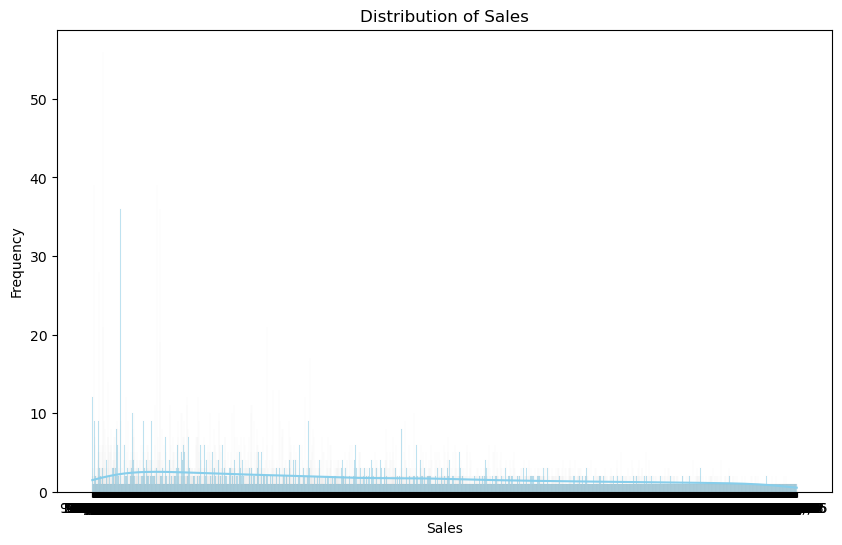

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
sns.histplot(superstore_data['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

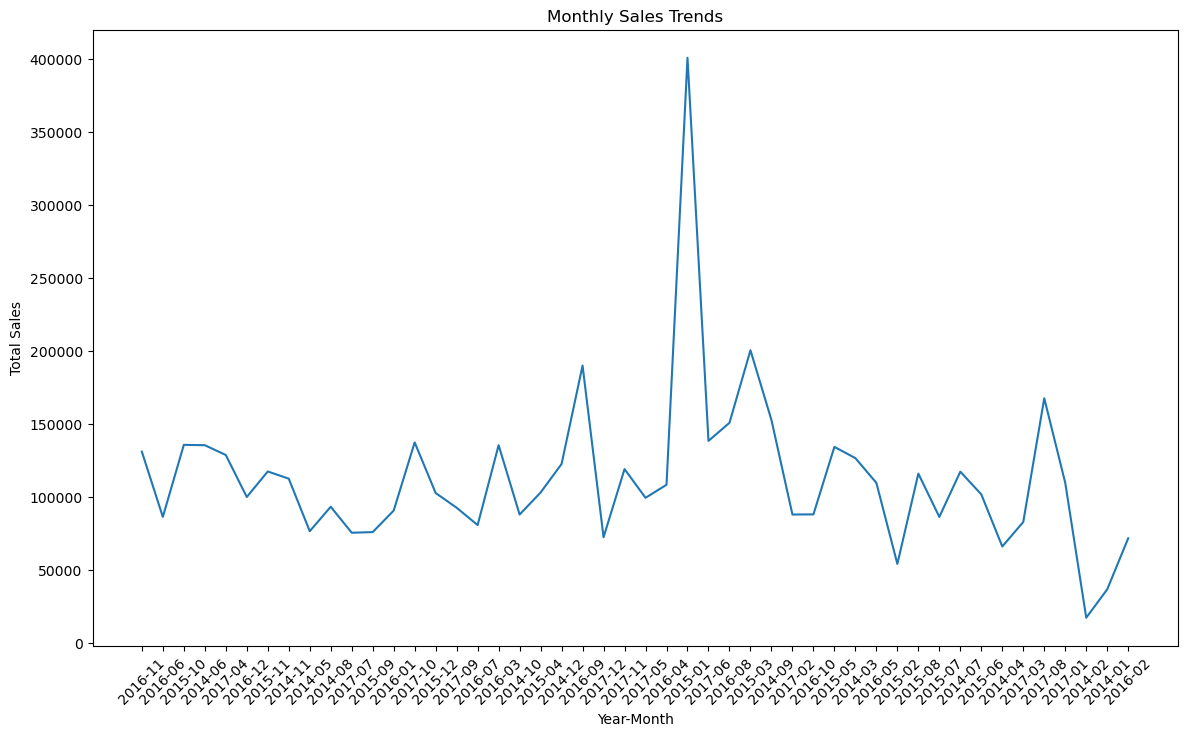

In [22]:
# Convert 'Order Date' to datetime format
superstore_data['Order Date'] = pd.to_datetime(superstore_data['Order Date'], format='%m/%d/%Y')

# Clean the 'Sales' column by removing non-numeric characters and converting to numeric
superstore_data['Sales'] = pd.to_numeric(superstore_data['Sales'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with NaN values in the 'Sales' column
superstore_data = superstore_data.dropna(subset=['Sales'])

# Extract the year and month from the Order Date
superstore_data['Order_YearMonth'] = superstore_data['Order Date'].dt.to_period('M')

# Convert 'Order_YearMonth' to string
superstore_data['Order_YearMonth'] = superstore_data['Order_YearMonth'].astype(str)

# Visualize sales trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Order_YearMonth', y='Sales', data=superstore_data, err_style=None)
plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

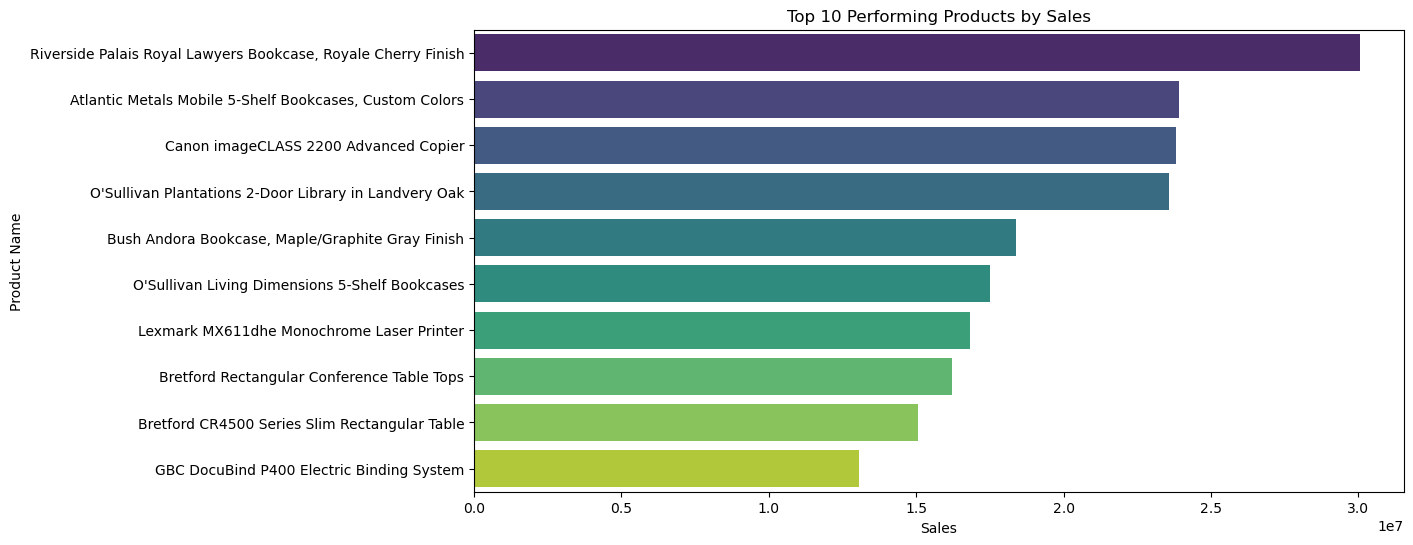

In [24]:
# Analyze product performance by sales
product_performance = superstore_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Visualize top-performing products
plt.figure(figsize=(12, 6))
sns.barplot(x=product_performance.values, y=product_performance.index, palette='viridis')
plt.title('Top 10 Performing Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()

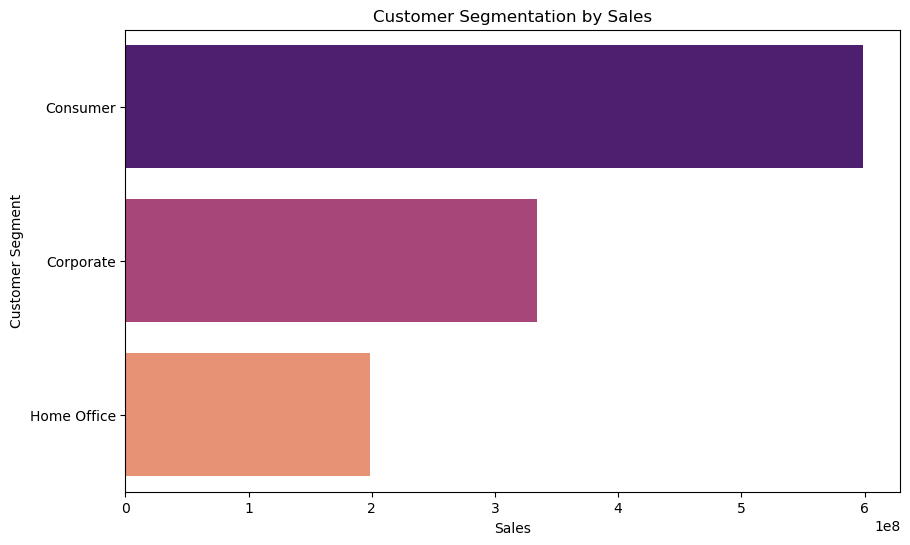

In [26]:
# Analyze customer segmentation based on purchasing behavior
customer_segments = superstore_data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segments.values, y=customer_segments.index, palette='magma')
plt.title('Customer Segmentation by Sales')
plt.xlabel('Sales')
plt.ylabel('Customer Segment')
plt.show()

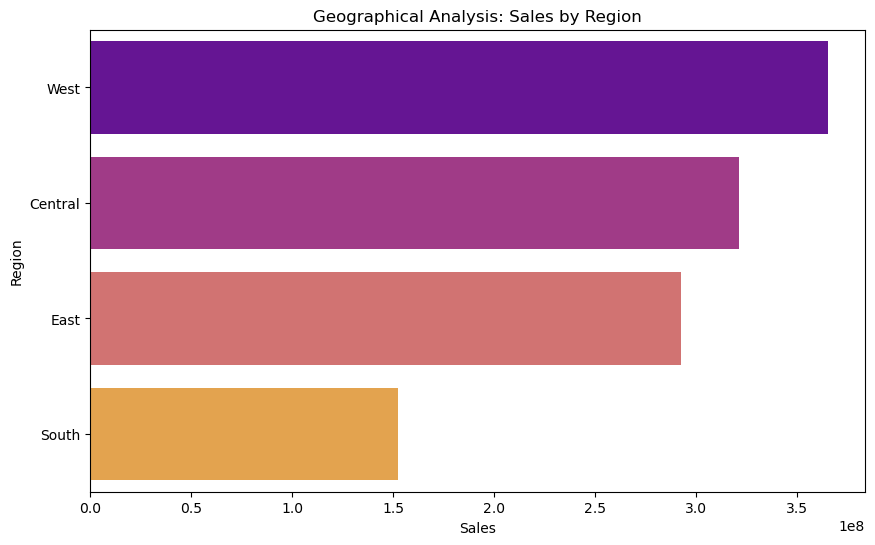

In [28]:
# Analyze sales patterns in different regions
region_analysis = superstore_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Visualize sales patterns in different regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_analysis.values, y=region_analysis.index, palette='plasma')
plt.title('Geographical Analysis: Sales by Region')
plt.xlabel('Sales')
plt.ylabel('Region')
plt.show()